# Load dataset in batches

This notebook demonstrates the workflow to generate batches of pairs (images and water masks) on a given dataset. It is assumed that the images and the masks are sub-directories of the dataset folder (parent folder).

## Requirements

Import dependencies.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
from models.batchLoader import BatchLoader
%matplotlib inline

## Batch Loader

The parameters of the `BatchLoader` class are defined below.

In [11]:
image_folder = 's2cloudless_imagery'
mask_folder = 's2cloudless_label_imagery'
batch_size = 5
image_size = (512, 512)

In [12]:
batch_loader = BatchLoader(image_folder, mask_folder, batch_size, image_size)

Note that the generator shuffles the images avaliable in the directory. It might become a class parameter in the upcoming releases if necessary.

In [13]:
batch_generator = batch_loader()
x, y = next(batch_generator)

Display the shape of the pair image and mask to verify its dimensions.

In [14]:
print("image batch size: ", x.shape)
print("mask batch size: ", y.shape)

image batch size:  (5, 512, 512, 3)
mask batch size:  (5, 512, 512, 1)


The first batch of pairs (images and water masks) are displayed below. The first column represents the original image, the second colum represents the mask and the third column applys the image on top of the mask.

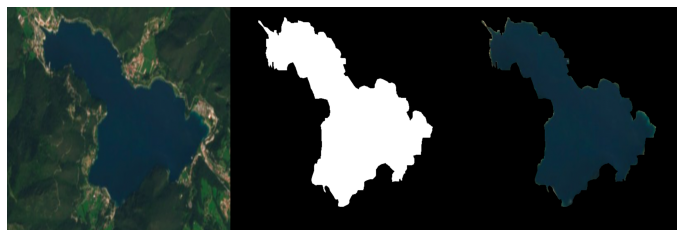

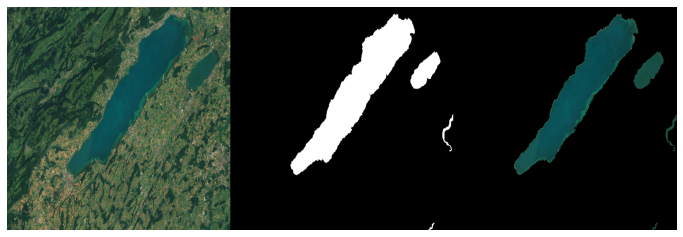

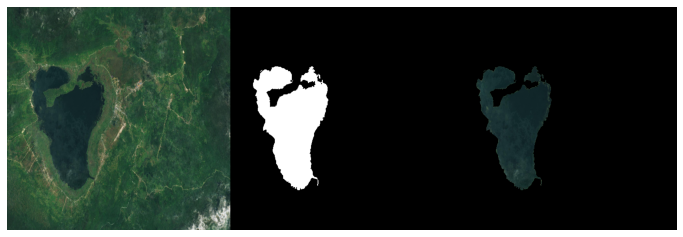

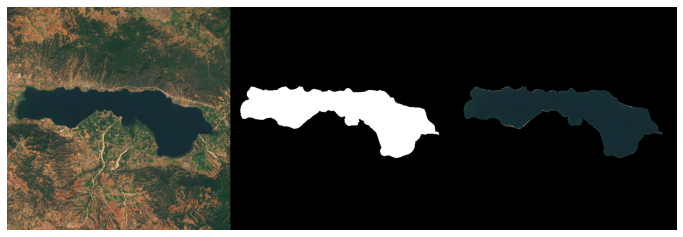

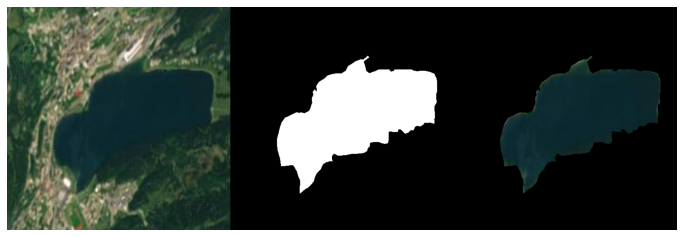

In [15]:
for i in range(batch_size):
    plt.figure(figsize=(12,6))
    plt.axis('off')
    pair = batch_loader.get_pair(x[i], y[i])
    plt.imshow(pair)